In [1]:
%tensorflow_version 2.x
import tensorflow
#print(tensorflow.__version__)


# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir("/content/drive/My Drive/dcu/future Learn_v2/MOOC 4 - CA683 - Feature engineering/M4 Colab Files/Data")
#!ls

UsageError: Line magic function `%tensorflow_version` not found.


Using TensorFlow backend.
(60000, 784)
(10000, 784)


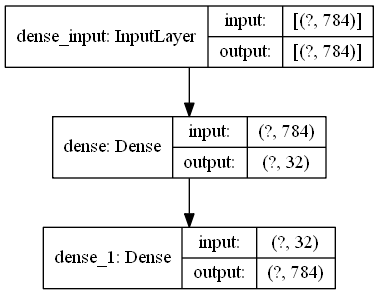

In [2]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras import regularizers
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

#,activity_regularizer=regularizers.l1(10e-5)

model = Sequential()
model.add(Dense(32,activation='relu',activity_regularizer=regularizers.l1(10e-5),input_dim=784))
model.add(Dense(784,activation='sigmoid'))
#loss_choice='mean_squared_error'
loss_choice='binary_crossentropy'
#model.compile(optimizer='adadelta', loss=loss_choice,metrics = ['accuracy'])
model.compile(loss=loss_choice,
              optimizer=tf.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [3]:
#print(x_train.shape)

history=model.fit(x_train,x_train,verbose=1,epochs=50,batch_size=256,shuffle=True,)
model.save('auto_en.h5')
 

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5363 - accuracy: 0.7052
Epoch 2/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3103 - accuracy: 0.7980
Epoch 3/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2708 - accuracy: 0.7989
Epoch 4/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2452 - accuracy: 0.7984
Epoch 5/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2228 - accuracy: 0.7984
Epoch 6/50
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2062 - accuracy: 0.7995
Epoch 7/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1939 - accuracy: 0.8009
Epoch 8/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1846 - accuracy: 0.8023
Epoch 9/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1770 - accuracy: 0.8035
Epoch 10/50
60

We have now trained our algorithm and I want to find the new decompressed variables. I have used an alternative piece of code to that shown previously. In it, we basically create a new neural network model by mimicking the original neural network up to the hidden layer. We then insert the weights from the original model. We then use the new_model predictions to get outputs.

In [4]:
new_model = Sequential()
new_model.add(Dense(32,activation='relu',activity_regularizer=regularizers.l1(10e-5),input_dim=784))
new_model.set_weights(model.layers[0].get_weights())
new_model.compile(optimizer='adam', loss='categorical_crossentropy')
output = new_model.predict(x_train)
print(output[0])

[ 0.          1.7483157   3.6353886   2.4936092   0.73345846  2.567174
  3.1976082   3.653097    2.3989792   2.7023737   4.71714     7.8667293
  4.95473     5.6405272   0.0372799   2.7685304   3.2065883   6.8864317
  6.1604004   0.          4.944987    6.2249637   1.8787544   0.
  1.9924954   4.9284296   0.         10.270773    4.3327107   0.
  0.51678103  0.        ]


In [5]:
predicted_image = model.predict(x_test)

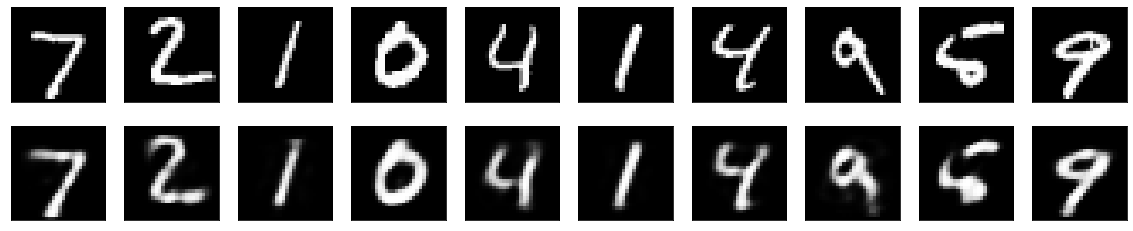

In [8]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

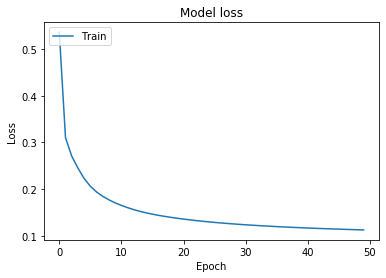

In [7]:
import matplotlib.pyplot as plt





# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()